In [1]:
import sys
print(sys.executable)

/home/husanaulakh5/Hunyuan3D-2/hunyuan3d_env/bin/python


In [ ]:
# Import necessary libraries
from hy3dgen.shapegen import Hunyuan3DDiTFlowMatchingPipeline
import trimesh
import matplotlib.pyplot as plt
import io
from PIL import Image

# Initialize the Hunyuan3D pipeline (ensure you're in the correct working directory)
pipeline = Hunyuan3DDiTFlowMatchingPipeline.from_pretrained('tencent/Hunyuan3D-2')


Try to load model from local path: /home/husanaulakh5/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
Model path not exists, try to download from huggingface


Fetching 59 files:   0%|          | 0/59 [00:00<?, ?it/s]

In [ ]:
# Import and run the Hunyuan3D pipeline
# from hy3dgen.shapegen import Hunyuan3DDiTFlowMatchingPipeline

# Load the pipeline using the pretrained model from the repo (or specify your local model path)
# pipeline = Hunyuan3DDiTFlowMatchingPipeline.from_pretrained('tencent/Hunyuan3D-2')

# Generate a mesh using the demo image (adjust the path if needed)
# mesh = pipeline(image='assets/demo.png')[0]
import torch

with torch.inference_mode():
    mesh = pipeline(image='assets/demo.png')[0]

# Export mesh to a GLB file
mesh.export('output_mesh.glb')
print("Mesh generated and saved as output_mesh.glb")

Using border_ratio from init: 0.15


MC Level 0.0 Implicit Function:: 100%|██████████| 7134/7134 [02:18<00:00, 51.38it/s]


Mesh generated and saved as output_mesh.glb


In [ ]:
import torch
print(torch.cuda.is_available())  # should return True
print(torch.cuda.get_device_name(0))

True
Tesla T4


In [ ]:
import torch

# import torch

# Initialise pipeline and move to GPU
pipeline = Hunyuan3DDiTFlowMatchingPipeline.from_pretrained('tencent/Hunyuan3D-2')

Try to load model from local path: /home/husanaulakh5/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
Model path not exists, try to download from huggingface


Fetching 59 files:   0%|          | 0/59 [00:00<?, ?it/s]

In [ ]:
with torch.inference_mode():
    mesh = pipeline(image='/home/husanaulakh5/Hunyuan3D-2/assets/example_images/073.png')[0]

# Export mesh to a GLB file
mesh.export('output_mesh2.glb')
print("Mesh generated and saved as output_mesh2.glb")

# Shape and Texture Generation

In [1]:
import torch
from PIL import Image
from hy3dgen.shapegen import Hunyuan3DDiTFlowMatchingPipeline
from hy3dgen.texgen import Hunyuan3DPaintPipeline


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.11/runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.11/runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "/home/husanaulakh5/Hunyuan3D-2/hunyuan3d_env/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/husanaulakh5/Hunyuan3D-2/hunyuan3d_env/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
 

In [2]:
# Shape generation
shape_pipe = Hunyuan3DDiTFlowMatchingPipeline.from_pretrained("tencent/Hunyuan3D-2")
mesh = shape_pipe(image="assets/demo.png")[0]

Try to load model from local path: /home/husanaulakh5/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
Model path not exists, try to download from huggingface


Fetching 59 files:   0%|          | 0/59 [00:00<?, ?it/s]

RuntimeError: Numpy is not available

In [ ]:
# Texture generation
texture_pipe = Hunyuan3DPaintPipeline.from_pretrained("tencent/Hunyuan3D-2")
textured_mesh = texture_pipe(mesh, image="assets/demo.png")

# Save textured mesh
textured_mesh.export("output_textured.glb")

# Inference Testing

In [1]:
# Cell 1: Imports and Environment Check
import os
import torch
from PIL import Image
import trimesh

# Import pipelines from hy3dgen
from hy3dgen.shapegen import Hunyuan3DDiTFlowMatchingPipeline
from hy3dgen.texgen import Hunyuan3DPaintPipeline

# Check versions
print("Torch version:", torch.__version__)

Torch version: 2.1.2+cu121


Loaded image: 895.png


/home/husanaulakh5/Hunyuan3D-2/hunyuan3d_env/lib/python3.11/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


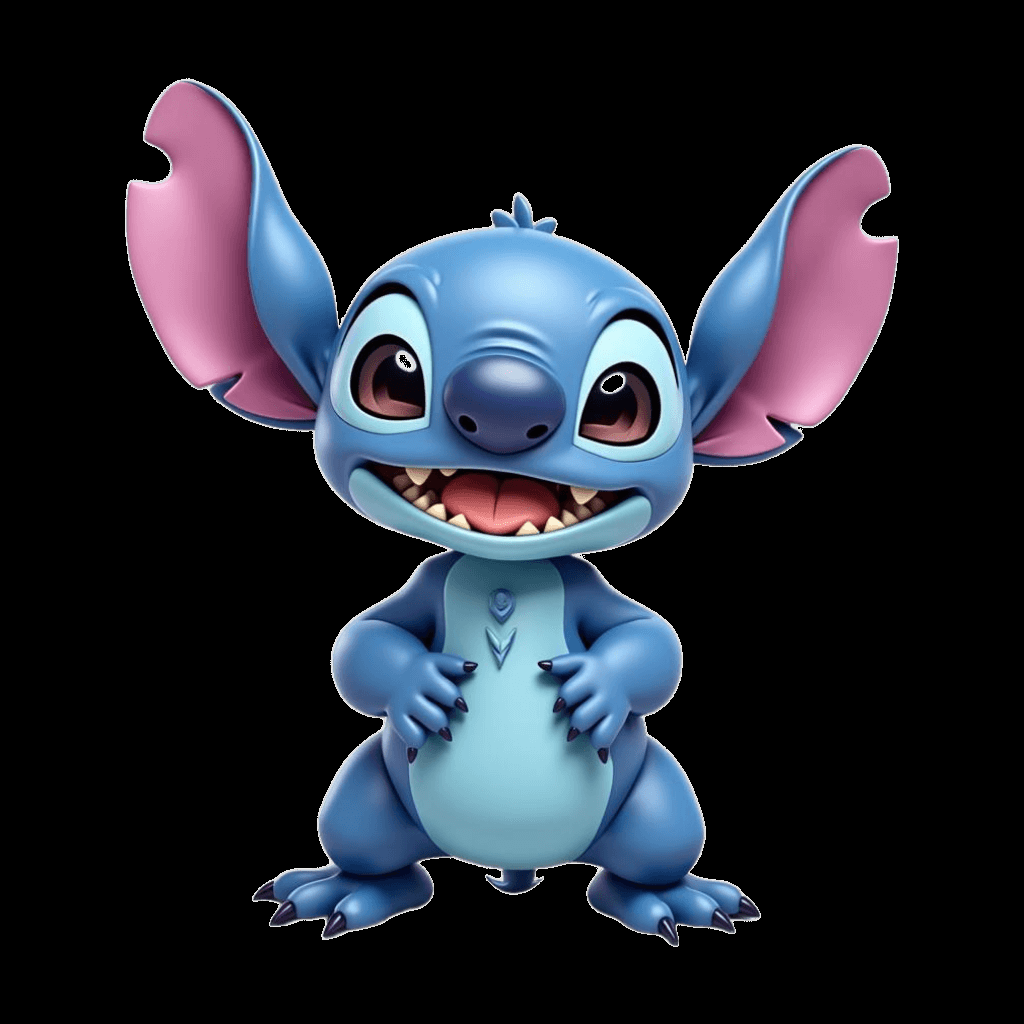

In [2]:
# Cell 2: Load and Display the Input Image

def load_image(image_path):
    try:
        img = Image.open(image_path).convert("RGB")
        print(f"Loaded image: {image_path}")
        return img
    except Exception as e:
        print("Error loading image:", e)
        raise

# Change the path to your test image (e.g., "895.png")
image_path = "895.png"
input_image = load_image(image_path)
input_image.show()  # This will display the image if your environment supports it.

In [3]:
# Cell 3: Test Shape Generation Pipeline

def generate_bare_mesh(image, device="cuda"):
    print("Loading Hunyuan3DDiTFlowMatchingPipeline (shape generation)...")
    # Load the pretrained shape model. Adjust the model identifier if needed.
    shape_pipeline = Hunyuan3DDiTFlowMatchingPipeline.from_pretrained(
        "tencent/Hunyuan3D-2",
        device=device  # For the shape pipeline, this argument is accepted.
    )
    print("Running shape generation...")
    # Run the pipeline; expected to return a list of meshes.
    result = shape_pipeline(image=image)
    bare_mesh = result[0]
    print("Bare mesh generated.")
    return bare_mesh

# Generate the bare mesh and display a summary
device = "cuda" if torch.cuda.is_available() else "cpu"
bare_mesh = generate_bare_mesh(input_image, device=device)
print("Bare mesh summary:")
print(bare_mesh)

Loading Hunyuan3DDiTFlowMatchingPipeline (shape generation)...
Try to load model from local path: /home/husanaulakh5/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
Model path not exists, try to download from huggingface


Fetching 79 files:   0%|          | 0/79 [00:00<?, ?it/s]

Running shape generation...
Using border_ratio from init: 0.15


MC Level 0.0 Implicit Function:: 100%|██████████| 7134/7134 [02:13<00:00, 53.62it/s]


Bare mesh generated.
Bare mesh summary:
<trimesh.Trimesh(vertices.shape=(570967, 3), faces.shape=(1141968, 3))>


In [8]:
# Cell 5: Test Texture Synthesis Pipeline

def apply_texture(bare_mesh, image, device="cuda"):
    print("Loading Hunyuan3DPaintPipeline (texture synthesis)...")
    try:
        # Attempt to load the texture pipeline.
        tex_pipeline = Hunyuan3DPaintPipeline.from_pretrained("tencent/Hunyuan3D-2")
    except RuntimeError as e:
        print("Error during loading texture pipeline:", e)
        raise
    
    # Move to device if applicable.
    if hasattr(tex_pipeline, "to"):
        tex_pipeline.to(device)
    
    print("Running texture synthesis...")
    textured_mesh = tex_pipeline(bare_mesh, image=image)
    print("Texturing complete.")
    return textured_mesh

# Before running, check if the expected texture checkpoint exists.
# It should be in a folder "hunyuan3d-paint-v2-0" under the model directory.
model_cache_dir = os.path.join(os.path.expanduser("~"), ".cache", "huggingface", "hub", "models--tencent--Hunyuan3D-2", "snapshots")
print("Looking for texture checkpoint folder in:", model_cache_dir)
found = False
for root, dirs, files in os.walk(model_cache_dir):
    if "hunyuan3d-paint-v2-0" in dirs:
        found = True
        texture_model_path = os.path.join(root, "hunyuan3d-paint-v2-0")
        print("Found texture model folder:", texture_model_path)
        break

if not found:
    print("Texture checkpoint folder 'hunyuan3d-paint-v2-0' not found in cache.")
    print("Please download the Hunyuan3D-Paint checkpoint from Hugging Face and place it in a folder named 'hunyuan3d-paint-v2-0' within your model directory.")

# If the checkpoint exists (or you manually set up the texture checkpoint), run texture synthesis:
try:
    final_mesh = apply_texture(bare_mesh, input_image, device=device)
    print("Final textured mesh summary:")
    print(final_mesh)
except Exception as e:
    print("Texture synthesis failed:", e)


Looking for texture checkpoint folder in: /home/husanaulakh5/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots
Found texture model folder: /home/husanaulakh5/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/efb40d890aeade24c68ec7555eb206de8ba68c77/hunyuan3d-paint-v2-0
Loading Hunyuan3DPaintPipeline (texture synthesis)...


Fetching 79 files:   0%|          | 0/79 [00:00<?, ?it/s]

You need to install HuggingFace Hub to load models from the hub.


Error during loading texture pipeline: Model path /home/husanaulakh5/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/efb40d890aeade24c68ec7555eb206de8ba68c77 not found
Texture synthesis failed: Model path /home/husanaulakh5/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/efb40d890aeade24c68ec7555eb206de8ba68c77 not found


In [4]:
# Cell 4: Test Texture Synthesis Pipeline

def apply_texture(bare_mesh, image, device="cuda"):
    print("Loading Hunyuan3DPaintPipeline (texture synthesis)...")
    # Remove the 'device' keyword from from_pretrained since it is not accepted.
    tex_pipeline = Hunyuan3DPaintPipeline.from_pretrained("tencent/Hunyuan3D-2")
    # If the pipeline supports moving to a device, call .to(device)
    if hasattr(tex_pipeline, "to"):
        tex_pipeline.to(device)
    print("Running texture synthesis...")
    textured_mesh = tex_pipeline(bare_mesh, image=image)
    print("Texturing complete.")
    return textured_mesh

# Run texture synthesis on the bare mesh
final_mesh = apply_texture(bare_mesh, input_image, device=device)
print("Final textured mesh summary:")
print(final_mesh)

Loading Hunyuan3DPaintPipeline (texture synthesis)...


Fetching 79 files:   0%|          | 0/79 [00:00<?, ?it/s]

You need to install HuggingFace Hub to load models from the hub.


RuntimeError: Model path /home/husanaulakh5/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/efb40d890aeade24c68ec7555eb206de8ba68c77 not found

In [ ]:
# Cell 5: Save the Mesh as a .glb File

def save_mesh_glb(mesh, output_path):
    try:
        mesh.export(output_path)
        print(f"Mesh successfully saved to: {output_path}")
    except Exception as e:
        print("Error saving mesh:", e)
        raise

# Create a folder called "Project Fair" in the current directory if it doesn't exist.
output_dir = os.path.join(os.getcwd(), "Project Fair")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Save the final mesh to "Project Fair/my_model.glb"
output_file = os.path.join(output_dir, "my_model.glb")
save_mesh_glb(final_mesh, output_file)

In [1]:
from hy3dgen.texgen import Hunyuan3DPaintPipeline
from hy3dgen.shapegen import Hunyuan3DDiTFlowMatchingPipeline

# let's generate a mesh first
# pipeline = Hunyuan3DDiTFlowMatchingPipeline.from_pretrained('tencent/Hunyuan3D-2')
# mesh = pipeline(image='assets/demo.png')[0]

pipeline = Hunyuan3DPaintPipeline.from_pretrained('tencent/Hunyuan3D-2')
# mesh = pipeline(mesh, image='assets/demo.png')


Fetching 79 files:   0%|          | 0/79 [00:00<?, ?it/s]

ImportError: /home/husanaulakh5/Hunyuan3D-2/hunyuan3d_env/lib/python3.11/site-packages/custom_rasterizer-0.1-py3.11-linux-x86_64.egg/custom_rasterizer_kernel.cpython-311-x86_64-linux-gnu.so: undefined symbol: _ZN2at4_ops4ones4callEN3c108ArrayRefINS2_6SymIntEEESt8optionalINS2_10ScalarTypeEES6_INS2_6LayoutEES6_INS2_6DeviceEES6_IbE